In [1]:
import numpy as np
from odesolve import solveto


# Ref: code from the Section 7 of specification.pdf
# test if functions can all work with numpy arrays
def f(X, t):
    x, y = X
    dxdt = y
    dydt = -x
    return np.array([dxdt, dydt])


t0 = 0
x0 = 1
y0 = 0
X0 = np.array([x0, y0])

h = 0.5
t1 = 1
X1 = solveto(f, X0, t0, t1, h)
print(X1)


[ 0.75 -1.  ]


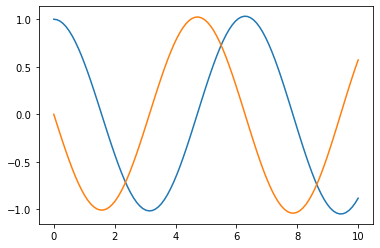

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from odesolve import odesolve


# Ref: code from the Section 8 of specification.pdf
# test if the odesolve is suitable for a plot
def f(X, t):
    x, y = X
    dxdt = y
    dydt = -x
    return np.array([dxdt, dydt])


x0 = 1
y0 = 0

X0 = np.array([x0, y0])
h = 0.01
t = np.linspace(0, 10, 100)

Xt = odesolve(f, X0, t, h)

plt.plot(t, Xt.T[0])
plt.plot(t, Xt.T[1])
plt.savefig('shm.pdf')
plt.show()


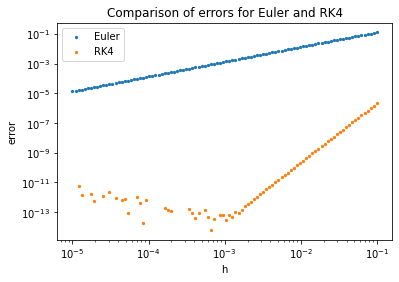

In [3]:
# plot and compare error of the two methods

import numpy as np
from odesolve import solveto, euler, rk4
import matplotlib.pyplot as plt


def f(x, t):
    return x


X0 = 1
t1 = 0
t2 = 1
f_value = 2.718281828459045
h_array = np.logspace(-5, -1, 100)
error0, error1 = [], []

# iterate over h to calculate error
for h in h_array:
    est_euler, est_rk4 = solveto(f, X0, t1, t2, h, euler), solveto(f, X0, t1, t2, h, rk4)
    error0.append(f_value - est_euler)
    error1.append(f_value - est_rk4)

plt.scatter(h_array, error0, label='Euler', s=5)
plt.scatter(h_array, error1, label='RK4', s=5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("h")
plt.ylabel("error")
plt.legend()
plt.title('Comparison of errors for Euler and RK4')
plt.show()
